In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn
import nltk
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_absolute_error,r2_score
import seaborn as sns
from datetime import datetime

In [2]:
# read the dataset
df=pd.read_csv("redditscrap.csv")

In [3]:
df.head()

,Unnamed: 0,title,score,url,num_comments,gilded,upvote_ratio,ups,down,created_utc
0,0,"GME Megathread for March 24, 2021",14292,https://www.reddit.com/r/wallstreetbets/commen...,14663,0,0.93,14292,0,1.616589e+09
1,1,What is a disturbing fact you wish you could u...,38915,https://www.reddit.com/r/AskReddit/comments/mb...,18490,0,0.89,38915,0,1.616544e+09
2,2,Now I get it!,19190,https://i.redd.it/tooi5niavyo61.png,308,0,0.93,19190,0,1.616588e+09
3,3,The American Dream,13647,https://i.imgur.com/49oaWns.png,287,0,0.96,13647,0,1.616584e+09
4,4,Forged in the Barrens Giveaway! Win 1 of 100 F...,1769,https://www.reddit.com/r/hearthstone/comments/...,15491,1,0.90,1769,0,1.616584e+09


In [4]:
# drop the column Unname :0
df.drop(columns="Unnamed: 0",inplace=True)

In [5]:
df.describe()

,score,num_comments,gilded,upvote_ratio,ups,down,created_utc
count,7358.000000,7358.000000,7358.000000,7358.000000,7358.000000,7358.0,7.358000e+03
mean,3106.425659,100.767736,0.050285,0.970747,3106.425659,0.0,1.616565e+09
std,8350.197662,649.774915,0.711409,0.033010,8350.197662,0.0,2.145485e+04
min,64.000000,0.000000,0.000000,0.670000,64.000000,0.0,1.616510e+09
25%,221.000000,9.000000,0.000000,0.960000,221.000000,0.0,1.616549e+09
50%,593.000000,23.000000,0.000000,0.980000,593.000000,0.0,1.616570e+09
75%,2083.750000,63.000000,0.000000,0.990000,2083.750000,0.0,1.616583e+09
max,132670.000000,33735.000000,54.000000,1.000000,132670.000000,0.0,1.616595e+09


In [6]:
# check is there any null values
df.isna().sum()

title           0
score           0
url             0
num_comments    0
gilded          0
upvote_ratio    0
ups             0
down            0
created_utc     0
dtype: int64

In [7]:
df.dtypes

title            object
score             int64
url              object
num_comments      int64
gilded            int64
upvote_ratio    float64
ups               int64
down              int64
created_utc     float64
dtype: object

In [8]:
## pandas profiling for analysis of entire dataset
from pandas_profiling import ProfileReport
profile=ProfileReport(df,title="pandas profile report")

In [9]:
profile

Summarize dataset:   0%|          | 0/23 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [10]:
df["down"].value_counts()

0    7358
Name: down, dtype: int64

In [11]:
# drop the column url and down
df.drop(columns=["url","down"],inplace=True)

In [12]:
df.head()

,title,score,num_comments,gilded,upvote_ratio,ups,created_utc
0,"GME Megathread for March 24, 2021",14292,14663,0,0.93,14292,1.616589e+09
1,What is a disturbing fact you wish you could u...,38915,18490,0,0.89,38915,1.616544e+09
2,Now I get it!,19190,308,0,0.93,19190,1.616588e+09
3,The American Dream,13647,287,0,0.96,13647,1.616584e+09
4,Forged in the Barrens Giveaway! Win 1 of 100 F...,1769,15491,1,0.90,1769,1.616584e+09


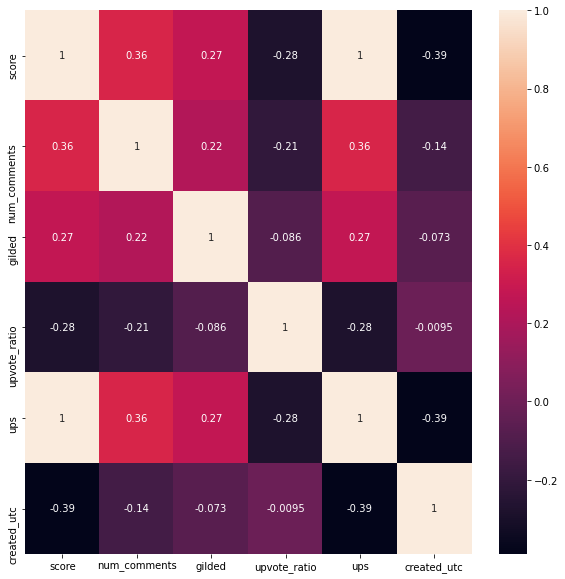

In [13]:
# find correlation between diffrent features
corr=df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True)
plt.show()

In [14]:
df["created_utc"] = pd.to_datetime(df['created_utc'], unit='s')

In [15]:
df.tail()

,title,score,num_comments,gilded,upvote_ratio,ups,created_utc
7353,Did I stutter?!,102,5,0,1.00,102,2021-03-24 10:55:54
7354,We all agree that Pugs are the ugliest right?,166,18,0,0.82,166,2021-03-24 08:16:50
7355,"Every time Tyler, every time",68,3,0,0.98,68,2021-03-24 13:18:41
7356,Nobody remembers the elephant birds :/,136,12,0,0.97,136,2021-03-24 09:22:05
7357,it do be like that,67,3,0,0.98,67,2021-03-24 14:06:50


In [16]:
x1=df.drop(columns=["title"])

In [17]:
# getting feature value
features=x1.columns

In [18]:
features

Index(['score', 'num_comments', 'gilded', 'upvote_ratio', 'ups',
       'created_utc'],
      dtype='object')

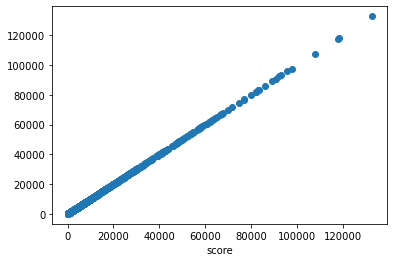

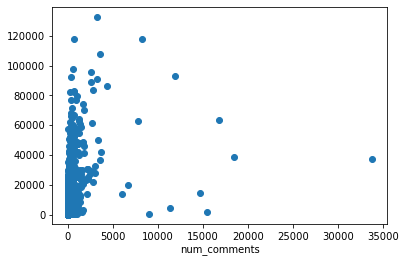

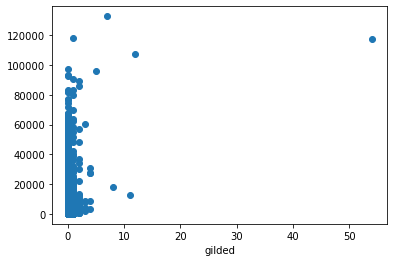

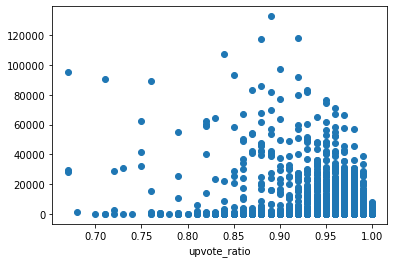

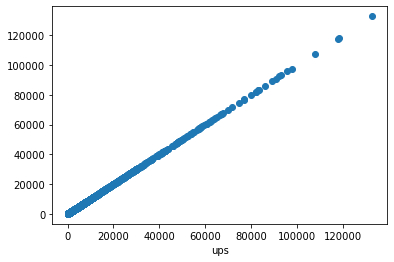

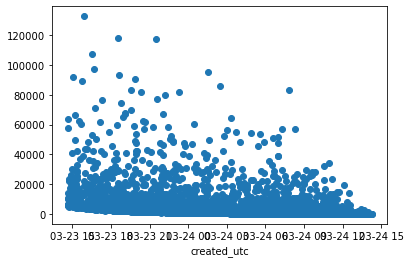

In [19]:
# scatter plot to determine the how the features and dependant variable ["Score"] related
for ftr in features:
    data=x1.copy()
    plt.scatter(data[ftr],data["score"])
    plt.xlabel(ftr)
    plt.show()

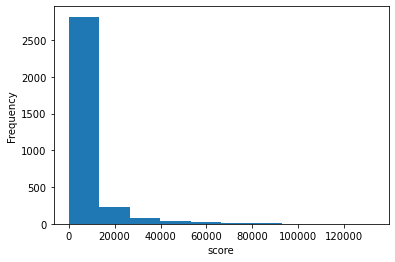

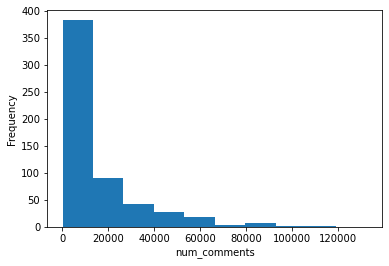

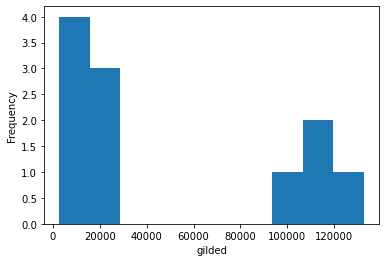

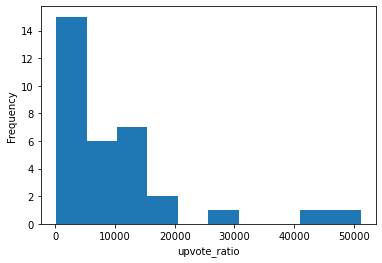

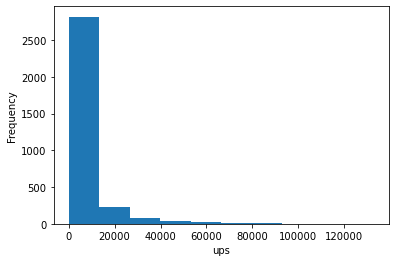

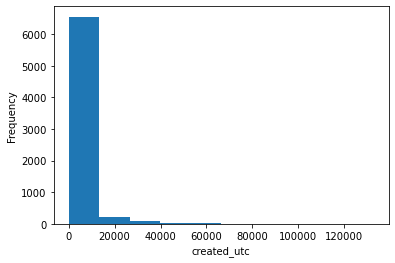

In [20]:
# how data is ditributed
for ftr in features:
    data=x1.copy()
    data.groupby(ftr)["score"].mean().plot.hist()
    plt.xlabel(ftr)
    plt.show()

In [21]:
y=df["score"]

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer()
text=tfidf.fit_transform(df["title"]).toarray()

In [39]:
# dumping the model to transform.pkl
import pickle
pickle.dump(tfidf,open("transform.pkl","wb"))

In [23]:
tfidf.get_feature_names()[:20]

['00',
 '000',
 '0001326380',
 '000132638021000032',
 '000ft',
 '008',
 '01',
 '02',
 '03',
 '04',
 '06',
 '0695',
 '07',
 '08',
 '080',
 '0_0',
 '0strolist',
 '10',
 '100',
 '1000']

In [24]:
text

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [25]:
x2=pd.DataFrame(text)

In [26]:
x2.head()

,0,1,2,3,4,5,6,7,8,9,...,12772,12773,12774,12775,12776,12777,12778,12779,12780,12781
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
x=df.drop(columns=["score","title","created_utc"])

In [28]:
finaldf=pd.concat([x2,x],axis=1)

In [29]:
finaldf.head()

,0,1,2,3,4,5,6,7,8,9,...,12776,12777,12778,12779,12780,12781,num_comments,gilded,upvote_ratio,ups
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,14663,0,0.93,14292
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,18490,0,0.89,38915
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,308,0,0.93,19190
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,287,0,0.96,13647
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,15491,1,0.90,1769


In [30]:
y.shape

(7358,)

In [31]:
finaldf.shape

(7358, 12786)

In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(finaldf,y,test_size=.25,random_state=40)

In [33]:
x.dtypes

num_comments      int64
gilded            int64
upvote_ratio    float64
ups               int64
dtype: object

In [34]:
from sklearn.ensemble import RandomForestRegressor
modelRandomRegressor=RandomForestRegressor()
modelRandomRegressor.fit(x_train,y_train)

RandomForestRegressor()

In [35]:
modelRandomRegressor.score(x_test,y_test)
y_predict=modelRandomRegressor.predict(x_test)
from sklearn.metrics import r2_score,mean_absolute_error
print("MAE :",mean_absolute_error(y_test,y_predict))
print("r2 score :",r2_score(y_test,y_predict))

MAE : 7.848173913043477
r2 score : 0.9999574731735656


/Users/mufseeramusthafa/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


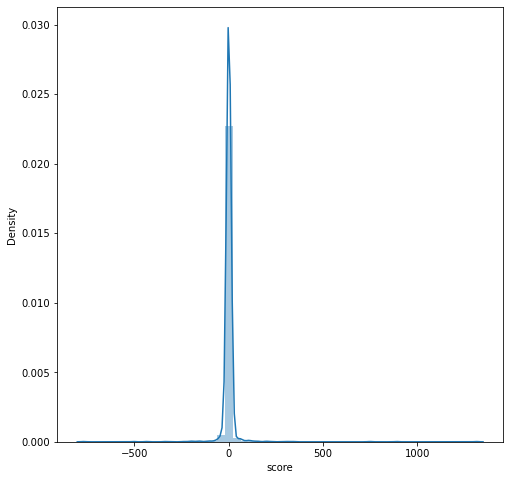

In [38]:
predictionCV=modelRandomRegressor.predict(x_test)
plt.figure(figsize = (8,8))
sns.distplot(y_test-predictionCV)
plt.show()

In [127]:
from sklearn.ensemble import ExtraTreesRegressor
modelExtraRegressor=ExtraTreesRegressor()
modelExtraRegressor.fit(x_train,y_train)

ExtraTreesRegressor()

In [128]:
modelExtraRegressor.score(x_test,y_test)
y_predict=modelExtraRegressor.predict(x_test)
from sklearn.metrics import r2_score,mean_absolute_error
print("MAE :",mean_absolute_error(y_test,y_predict))
print("r2 score :",r2_score(y_test,y_predict))

MAE : 7.2629565217391345
r2 score : 0.9999361236885148


In [129]:
from sklearn.neighbors import KNeighborsRegressor
modelKNeighborsRegressor=KNeighborsRegressor()
modelKNeighborsRegressor.fit(x_train,y_train)

KNeighborsRegressor()

In [130]:
y_predict=modelKNeighborsRegressor.predict(x_test)
from sklearn.metrics import r2_score,mean_absolute_error
print("MAE :",mean_absolute_error(y_test,y_predict))
print("r2 score :",r2_score(y_test,y_predict))

MAE : 18.21326086956521
r2 score : 0.9997376881009835


In [40]:
# dumping the random forest reggressor model
pickle.dump(modelRandomRegressor,open("rfmodel.pkl","wb"))